In [ ]:
# Data handling
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model save/load
import joblib

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import zipfile
import os

# Zip file extract
with zipfile.ZipFile('/content/student.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/student_data')

# Files check
os.listdir('/content/student_data')

['student-mat.csv', 'student-merge.R', 'student.txt', 'student-por.csv']

In [4]:
# Dataset semicolon separated hai
df = pd.read_csv('/content/student_data/student-mat.csv', sep=';')

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df.shape              # rows, columns

(395, 33)

In [6]:
df.isnull().sum()     # missing values check

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [7]:
df.info()             # data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
# G3 >= 10 → PASS (1), else FAIL (0)
df['pass_fail'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

In [9]:
features = [
    'G1',        # first period marks
    'G2',        # second period marks
    'studytime', # study effort
    'failures',  # past failures
    'absences',  # attendance
    'famrel',    # family relationship
    'goout',     # social life
    'health'     # health condition
]

X = df[features]        # input
y = df['pass_fail']     # output

In [10]:
# Train-test split & validation
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [11]:
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [12]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9367088607594937
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.96      0.94      0.95        52

    accuracy                           0.94        79
   macro avg       0.93      0.93      0.93        79
weighted avg       0.94      0.94      0.94        79



In [13]:
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross Validation Accuracy:", cv_scores.mean())

Cross Validation Accuracy: 0.8987341772151899


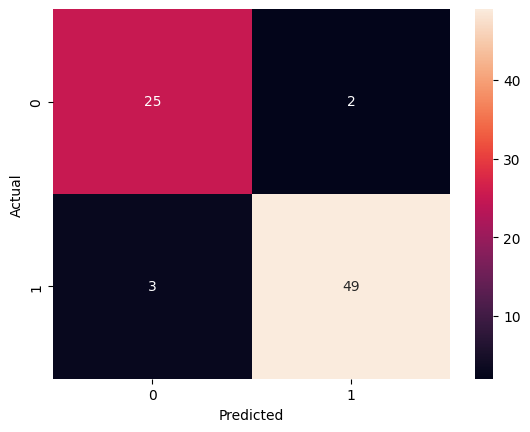

In [14]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [15]:
importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print(importance)

G2           0.485266
G1           0.247046
absences     0.077297
goout        0.046316
failures     0.045743
health       0.041166
famrel       0.029609
studytime    0.027557
dtype: float64


In [16]:
joblib.dump(model, "student_performance_model.pkl")

loaded_model = joblib.load("student_performance_model.pkl")

In [17]:
new_student = pd.DataFrame([{
    'G1': 12,
    'G2': 11,
    'studytime': 2,
    'failures': 0,
    'absences': 6,
    'famrel': 4,
    'goout': 2,
    'health': 3
}])

# FAIL hone ki probability
fail_prob = loaded_model.predict_proba(new_student)[0][0]

print("Fail Probability:", round(fail_prob, 2))

Fail Probability: 0.0


In [18]:
def risk_level(prob):
    if prob < 0.3:
        return "LOW RISK"
    elif prob < 0.6:
        return "MEDIUM RISK"
    else:
        return "HIGH RISK"

print("Risk Level:", risk_level(fail_prob))

Risk Level: LOW RISK


In [19]:
def intervention_action(prob):
    if prob > 0.6:
        return "Immediate counseling + extra classes"
    elif prob > 0.3:
        return "Monitor attendance and provide support"
    else:
        return "No intervention needed"

print("Suggested Action:", intervention_action(fail_prob))

Suggested Action: No intervention needed


In [23]:
%%writefile app.py
# (Yaha sirf Streamlit ka code hota hai)

import streamlit as st
import pandas as pd
import joblib

model = joblib.load("student_performance_model.pkl")

st.title("🎓 Student Performance Prediction")

# UI inputs
G1 = st.slider("G1 Marks", 0, 20, 10)
G2 = st.slider("G2 Marks", 0, 20, 10)
studytime = st.selectbox("Study Time", [1,2,3,4])
failures = st.selectbox("Past Failures", [0,1,2,3])
absences = st.slider("Absences", 0, 50, 5)
famrel = st.selectbox("Family Relationship", [1,2,3,4,5])
goout = st.selectbox("Going Out", [1,2,3,4,5])
health = st.selectbox("Health", [1,2,3,4,5])

input_data = pd.DataFrame([{
    'G1': G1,
    'G2': G2,
    'studytime': studytime,
    'failures': failures,
    'absences': absences,
    'famrel': famrel,
    'goout': goout,
    'health': health
}])

if st.button("Predict"):
    prob = model.predict_proba(input_data)[0][0]
    st.write("Fail Probability:", round(prob, 2))

Overwriting app.py


In [22]:
%%writefile requirements.txt
streamlit
pandas
numpy
scikit-learn
joblib

Writing requirements.txt
